## GitHub User Name: aton-physics

## Email: andrew_ton@brown.edu

This is my method for solving ODEs (possibly coupled) using RK4 integration

In [131]:
import matplotlib.pyplot as plt # for plotting          
import numpy as np
#%matplotlib notebook  
%matplotlib inline
class DiffEQ (object):
    #solves first order ODEs using an RK4 method
    def __init__(self, a1=1.0, a2=1.0, x10 = 0.0, x20 = 0.0, t=0.0, tf = 10.0, dt = 0.01):
        #solves dx/dt = ax
        print("DiffEQ initialized")
        self.a1 = a1
        self.a2 = a2
        self.x1 = x10
        self.x2 = x20
        self.t = t
        self.tf = tf
        self.dt = 0.01
        npoints = int(tf/dt)
        print("a1 = {0:0.2f}, a2 = {1:0.2f}, x10 = {2:0.2f}, x20 = {3:0.2f}".format(self.a1, self.a2, self.x1, self.x2))
        self.npoints = npoints
        self.tarray = np.linspace(0.0, tf,npoints, endpoint = True) # include final timepoint
    def differential_equation(self, x1, x2, t):
        result = self.a1*x1 + self.a2*x2
        return result
    def RK4_step(self):
        k1 = self.dt*self.differential_equation(self.x1, 0, self.t)
        k2 = self.dt*self.differential_equation(self.x1 + k1/2, 0, self.t + self.dt/2)
        k3 = self.dt*self.differential_equation(self.x1 + k2/2, 0, self.t + self.dt/2)
        k4 = self.dt*self.differential_equation(self.x1 + k3, 0, self.t + self.dt)
        self.t += self.dt
        self.x1 += (k1 + 2*k2 + 2*k3 + k4)/6
    def RK4_couple(self):
        k1 = self.dt*self.differential_equation(self.x1, 0, self.t)
        j1 = self.dt*self.differential_equation(self.x1, self.x2, self.t)
        k2 = self.dt*self.differential_equation(self.x1 + k1/2, 0, self.t + self.dt/2)
        j2 = self.dt*self.differential_equation(self.x1 + k1/2, self.x2 + j1/2, self.t + self.dt/2)
        k3 = self.dt*self.differential_equation(self.x1 + k2/2, 0, self.t + self.dt/2)
        j3 = self.dt*self.differential_equation(self.x1 + k2/2, self.x2 + j2/2, self.t + self.dt/2)
        k4 = self.dt*self.differential_equation(self.x1 + k3, 0, self.t + self.dt)
        j4 = self.dt*self.differential_equation(self.x1 + k3, self.x2 + j3, self.t + self.dt)
        self.t += self.dt
        self.x1 += (k1 + 2*k2 + 2*k3 + k4)/6
        self.x2 += (j1 + 2*j2 + 2*j3 + j4)/6
    def trajectory(self, couple = "no"):
        '''
        Loop over time steps to generate a trajectory
        
        '''
        x1_array = []
        x2_array = []
        
        for ii in range(self.npoints):
            x1_array.append(self.x1)
            x2_array.append(self.x2)
            #propagate in time using an Euler Method
            if couple == "no":
                self.RK4_step()
            elif couple == "yes":
                self.RK4_couple()
            else:
                print("bad argument")
        self.x1_array = np.array(x1_array)
        self.x2_array = np.array(x2_array)
    def plot(self, ExactSolution):
        fig, ax = plt.subplots()
        ax.plot(self.tarray, self.x1_array, label = "numerical")
        ax.set(xlabel='time (s)', ylabel='population', title='RK4 integration of 1st order ODE')
        ax.grid()
        ax.plot(self.tarray, ExactSolution(self.tarray), label = "exact")
        plt.legend()
        fig.savefig("test.png")
        plt.show()
    def plot_couple(self, ExactSolution1, ExactSolution2, titlestring):
        fig, ax = plt.subplots()
        ax.plot(self.tarray, self.x1_array, label = "numerical x1")
        ax.plot(self.tarray, self.x2_array, label = "numerical x2")
        ax.set(xlabel='time (s)', ylabel='population', title=titlestring)
        ax.grid()
        ax.plot(self.tarray, ExactSolution1(self.tarray), label = "exact x1")
        ax.plot(self.tarray, ExactSolution2(self.tarray), label = "exact x2")
        plt.legend()
        fig.savefig("test.png")
        plt.show()
    def results(self):
        """" 
        Method to display the results at a given final time
        """
        
        print('\nPosition at Final Time:')
        print('RK4:')
        print('t = {0:0.2f} s | x = {1:0.3f} left'.format(self.t, self.x1))

## Checking my algorithm works. 

Integrate dx/dt = -x with x(0) = 1. Exact solution is x(t) = 1*exp(-t).

DiffEQ initialized
a1 = -1.00, a2 = 0.00, x10 = 1.00, x20 = 0.00

Position at Final Time:
RK4:
t = 10.00 s | x = 0.000 left


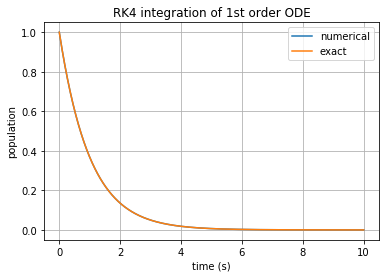

In [67]:
thing = DiffEQ(a1=-1.0, a2=0.0, x10 = 1.0)
thing.trajectory()
thing.results()
def inverse_exp(arg):
    return np.exp(-arg)
thing.plot(inverse_exp)

## It works! 
Let's begin with problem 1.

## Problem 1
a) The first order ODE we are to solve, given by analyzing the circuit, is:

b) We solve this ODE and plot it for a square wave of amplitude and frequency 1. 
The square wave can be described as $$V(t) = A*sgn(\sin(ft))$$
Here we let A = f = 1 so
$$V(t) = sgn(\sin(t))$$

c) Physically, the circuit is..

## Problem 2
The ODEs:
$$\frac{dN_A}{dt} = -\frac{N_A}{\tau_A}$$
$$\frac{dN_B}{dt} = \frac{N_A}{\tau_A} - \frac{N_B}{\tau_B}$$
The analytical solutions:
$$N_A(t) = N_A(0)e^{-\frac{t}{\tau_A}}$$
$$N_B(t) = N_B(0)e^{-\frac{t}{\tau_B}} - N_A(0)\frac{1}{\frac{\tau_A}{\tau_B}-1}e^{-(\frac{\tau_A + \tau_B}{\tau_A\tau_B})t}(e^{\frac{t}{\tau_B}}-e^{\frac{t}{\tau_A}})$$

DiffEQ initialized
a1 = -0.00, a2 = -1.00, x10 = 2000.00, x20 = 3000.00

Position at Final Time:
RK4:
t = 100.00 s | x = 1809.675 left


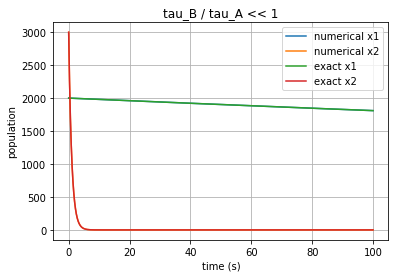

DiffEQ initialized
a1 = -1.00, a2 = -1.00, x10 = 2000.00, x20 = 3000.00

Position at Final Time:
RK4:
t = 100.00 s | x = 0.000 left


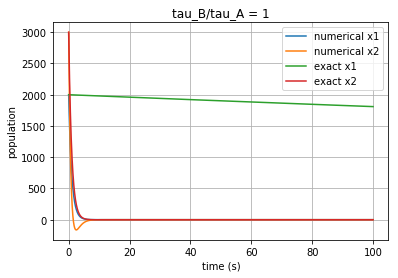

DiffEQ initialized
a1 = -1.00, a2 = -0.00, x10 = 2000.00, x20 = 3000.00

Position at Final Time:
RK4:
t = 100.00 s | x = 0.000 left


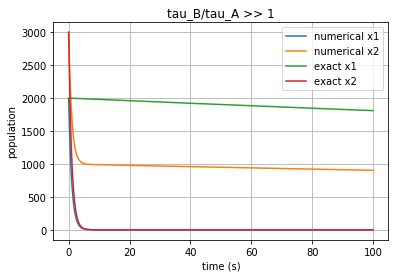

In [135]:
tauA = -1000.0 # -1*tauA gives the analytical tauA
tauB = -1.0
NA0 = 2000.0
NB0 = 3000.0
def inverse_exp(arg, ic1 = NA0, param1 = -tauA):
    return ic1*np.exp(-arg/param1)
def complicated_exact(arg, ic1 = NA0, ic2 = NB0, param1 = -tauA, param2 = -tauB):
    term1 = ic2*np.exp(-arg/param2)
    term2 = ic1/((param1/param2)-1)*np.exp(-arg*(param1+param2)/(param1*param2))*(np.exp(arg/param2)-np.exp(arg/param1))
    return term1 - term2
def PlotDiffEQ(tauA, tauB, NA0, NB0, titlestring):
    equation = DiffEQ(a1=1.0/tauA, a2=1.0/tauB, x10 = NA0, x20 = NB0, t = 0.0, tf = 100, dt = 0.01)
    equation.trajectory("yes")
    equation.results()
    equation.plot_couple(inverse_exp, complicated_exact, titlestring)
PlotDiffEQ(tauA, tauB, NA0, NB0, "tau_B / tau_A << 1")
tauA = -1.0 # -1*tauA gives the analytical tauA
tauB = -1.0
PlotDiffEQ(tauA, tauB, NA0, NB0, "tau_B/tau_A = 1")
tauA = -1.0
tauB = -1000.0
PlotDiffEQ(tauA, tauB, NA0, NB0, "tau_B/tau_A >> 1")
